In [968]:
import pandas as pd
import numpy as np


<h1>Задание 1</h1>

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

## **Решение**

In [969]:
url = 'https://raw.githubusercontent.com/PetrashkoLR/Wildberries/main/HW_PYTHON_3/shopping_trends.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


<h1>Задание 2.1</h1>

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")

## **Решение**

### 1)   Женщины применяют промокоды чаще, чем мужчины

In [970]:
df_promocode = df.groupby(['Gender', 'Promo Code Used'])['Promo Code Used'].count().reset_index(name = 'count')
df_promocode

,Gender,Promo Code Used,count
0,Female,No,1248
1,Male,No,975
2,Male,Yes,1677


**Гипотеза не подтвердилась. По полученным данным женщины не применяют промокоды от слова совсем**

### 2) Существует корреляция между возрастной группой и способом оплаты покупок

alpha = 0.05
p = 1.0

Способ оплаты не зависит от возрастной группы


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Age,,,,,,
"(10, 20]",0.165094,0.198113,0.179245,0.155660,0.188679,0.113208
"(20, 30]",0.166893,0.147897,0.162822,0.175034,0.181818,0.165536
"(30, 40]",0.165517,0.171034,0.193103,0.168276,0.129655,0.172414
"(40, 50]",0.154667,0.149333,0.174667,0.166667,0.186667,0.168000
"(50, 100]",0.161247,0.176829,0.180894,0.151762,0.155827,0.173442


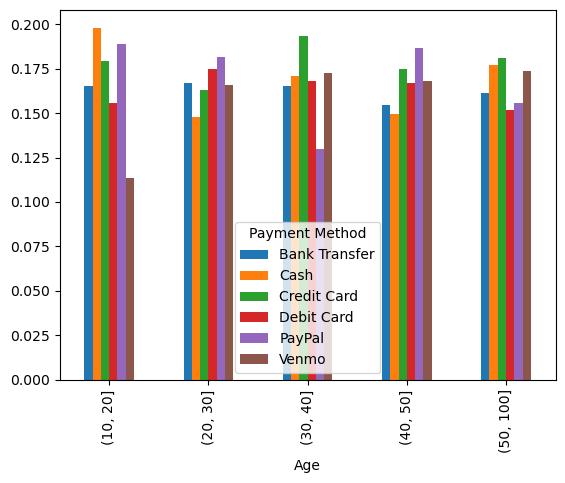

In [971]:
import scipy.stats as stats

age = pd.cut(df["Age"], [10, 20, 30, 40, 50, 100])
agee = pd.DataFrame(pd.cut(df['Age'],[10, 20, 30, 40, 50, 100]))
agee_arr = np.array(agee.groupby('Age')['Age'].count())

df_pivot_cash_age = (df.pivot_table("Age", index=[age], columns="Payment Method", aggfunc = 'count').T / agee_arr).T # Нормировка
df_pivot_cash_age.plot(kind = 'bar')


statistic, p, dof, expected_freq = stats.chi2_contingency(df_pivot_cash_age)     # H_0 : (нулевая гипотеза) Две переменные независимы.
alpha = 0.05                                                                     # H_1 : (альтернативная гипотеза) Две переменные не являются независимыми.
print(f'alpha = {alpha}\np = {p}\n')                                             # Видим, что нулевая гипотеза не отвергается

if p > alpha:
    print('Способ оплаты не зависит от возрастной группы')
else:
    print('Зависимость между возрастной группой и способом оплаты возможна')

df_pivot_cash_age

### 3) Существует связь между категорией покупок и временами года 

alpha = 0.05
p = 0.999999999998741

Категория покупок и время года независимы


Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,0.261290,0.242742,0.251613,0.244355
Clothing,0.245826,0.261370,0.234888,0.257916
Footwear,0.227045,0.272120,0.267112,0.233723
Outerwear,0.271605,0.250000,0.231481,0.246914


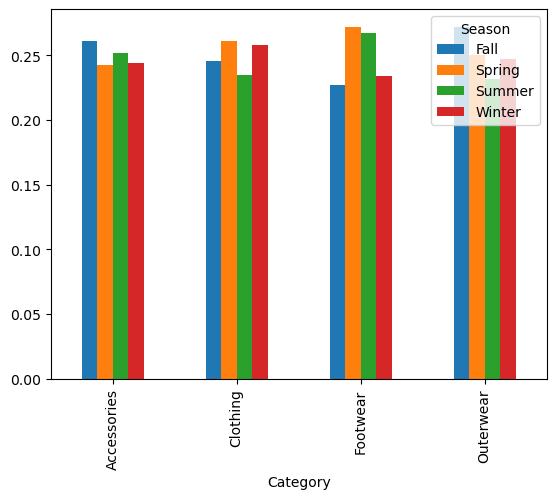

In [972]:
#df_seasons_category = df.groupby(['Category', 'Season'])['Season'].count().reset_index(name = 'count')
count_category = np.array(pd.crosstab(df['Category'], df['Season'])).sum(axis = 1)

df_seasons_category_crosstab = (pd.crosstab(df['Category'], df['Season']).T / count_category).T   #Нормировка                        
df_seasons_category_crosstab.plot(kind = 'bar')

statistic, p2, dof, expected_freq = stats.chi2_contingency(df_seasons_category_crosstab)      # H_0 : (нулевая гипотеза) Две переменные независимы.
alpha = 0.05                                                                                  # H_1 : (альтернативная гипотеза) Две переменные не являются независимыми.
print(f'alpha = {alpha}\np = {p2}\n')                                                         # Видим, что нулевая гипотеза не отвергается

if p2 > alpha:
    print('Категория покупок и время года независимы')
else:
    print('Связь есть')
    
df_seasons_category_crosstab

### 4) На покупки свыше 60$ предпочитаемый и фактический метод оплаты совпадают

In [973]:
pd.options.mode.chained_assignment = None

df_payment = df[df['Purchase Amount (USD)'] >= 60]
df_payment['Do the payment methods match?'] = df_payment['Payment Method'] == df_payment['Preferred Payment Method']

crosstab_payment = pd.crosstab(df_payment['Payment Method'], df_payment['Do the payment methods match?']) 

crosstab_payment

Do the payment methods match?,False,True
Payment Method,,
Bank Transfer,257,58
Cash,266,64
Credit Card,314,53
Debit Card,253,37
PayPal,262,55
Venmo,298,46


Как видно из таблицы, гипотеза неверна

### 5) Каждый размер одежды в среднем покупают в равном количестве

<Axes: title={'center': 'Distribution of clothing sizes'}, xlabel='Size', ylabel='Count'>

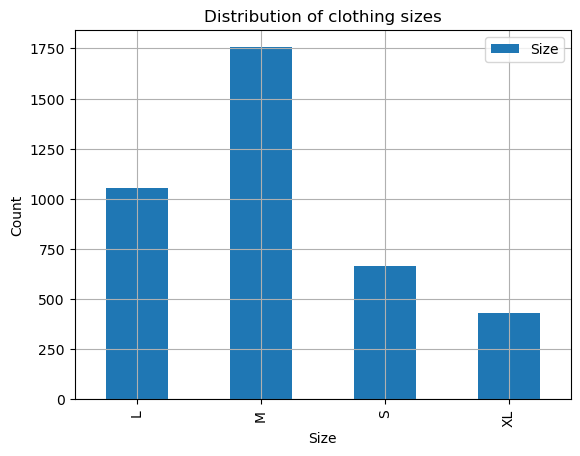

In [974]:
df_size = pd.DataFrame(df.groupby('Size')['Size'].count())
df_size.plot(kind = 'bar', grid = True, ylabel = 'Count', title = 'Distribution of clothing sizes')

Как видно из графиков, гипотеза неверна. Наиболее популярный размер - М

<h1>Задание 2.2</h1>

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды. 

## **Решение**

### Самый популярный товар

In [975]:
df1 = pd.DataFrame(df['Item Purchased']).copy()     # Выбираю из исходной толбицы столбец с наименованиями товаров
df1_group = df1.groupby(['Item Purchased'])['Item Purchased'].count().reset_index(name = 'count')     # Группирую по названиям и добавляю столбик count с кол-вом

max_count = np.max(df1_group['count'])     # Нахожу максимальное число товаров в группе среди всех групп
print("The most popular items: \n") 
df1_group[df1_group['count'] == max_count]    # Отбираю те группы товаров (по наименованию товара), у которых больше всего покупок 

The most popular items: 



,Item Purchased,count
2,Blouse,171
12,Jewelry,171
13,Pants,171


### Распределение покупателей по полу

<Axes: title={'center': 'Distribution Male/Female'}, ylabel='count'>

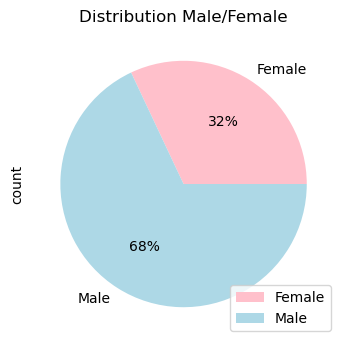

In [976]:
df2 = pd.DataFrame(df['Gender']).copy()     # Выбираю из исходной толбицы столбец с гендером покупателя
df2_group = df2.groupby(['Gender'], )['Gender'].count().reset_index(name = 'count')     # Группирую их и нахожу кол-во в каждой группе

# Построение круговой диаграммы 
colors = ['pink', 'lightblue'] 
df2_group.plot(kind = 'pie', y = 'count', autopct='%1.0f%%', colors = colors, labels = df2_group['Gender'], figsize = (4, 4), title='Distribution Male/Female')

### Определение какой пол покупает больше всего, чаще всего, самые дорогие товары

In [977]:
gender_max = df.groupby(['Gender'])['Gender'].count().reset_index(name = 'count')      # Группировка по полу с выведением в доп. столбец кол-ва человек
index_max_count = (gender_max['count'].idxmax())     # Индекс строки с бОльшим кол-вом людей в группе
print("Больше всего покупают:", gender_max.iloc[gender_max.index[index_max_count]]['Gender']) 

gender_max

Больше всего покупают: Male


,Gender,count
0,Female,1248
1,Male,2652


In [978]:
array_frequency = df['Frequency of Purchases'].unique()      # Массив видов частот покупок
gender_frequency = df.groupby(['Frequency of Purchases', 'Gender'])['Gender'].count().reset_index(name = 'count')     # Группируем по частотам и гендерам
for freq in array_frequency:     # В каждой группе частоты определяем какой гендер больше совершал покупок
    i = gender_frequency[gender_frequency['Frequency of Purchases'] == freq]     # Мини массив с конкретной частотой
    max_index = i['count'].idxmax()     # Индекс у строки с большим кол-вом людей
    print(f"Чаще покупают с частотой {i['Frequency of Purchases'].loc[max_index]}:", i['Gender'].loc[max_index])

# Самое частое - еженедельные покупки, поэтому отдельно выведу гендер по этой группе
max_index2 = gender_frequency[gender_frequency['Frequency of Purchases'] == 'Weekly']['count'].idxmax()  
print(f'\nЧаще всего совершают покупки: {gender_frequency["Gender"].loc[max_index2]}')

gender_frequency

Чаще покупают с частотой Fortnightly: Male
Чаще покупают с частотой Weekly: Male
Чаще покупают с частотой Annually: Male
Чаще покупают с частотой Quarterly: Male
Чаще покупают с частотой Bi-Weekly: Male
Чаще покупают с частотой Monthly: Male
Чаще покупают с частотой Every 3 Months: Male

Чаще всего совершают покупки: Male


,Frequency of Purchases,Gender,count
0,Annually,Female,185
1,Annually,Male,387
2,Bi-Weekly,Female,188
3,Bi-Weekly,Male,359
4,Every 3 Months,Female,186
5,Every 3 Months,Male,398
6,Fortnightly,Female,163
7,Fortnightly,Male,379
8,Monthly,Female,185
9,Monthly,Male,368


In [979]:
highest_price = df['Purchase Amount (USD)'].max()     # Цена самого дорогого товара 
most_expensive = df[df['Purchase Amount (USD)'] == highest_price]     # Таблица с самыми дорогими товарами
most_expensive_group = most_expensive.groupby('Gender')['Gender'].count().reset_index(name = 'count')     # Группировка этой таблицы по гендерам

max_index = most_expensive_group['count'].idxmax()     # Индекс строки с бОльшим кол-вом людей в группе
print(f'Больше дорогих покупок совершают: {most_expensive_group["Gender"].loc[max_index]}')

most_expensive_group

Больше дорогих покупок совершают: Male


,Gender,count
0,Female,11
1,Male,25


### Определение какой возраст покупает больше всего, чаще всего, самые дорогие товары

In [980]:
age_max = df.groupby(['Age'])['Age'].count().reset_index(name = 'count')      # Группировка по возрасту с выведением в доп. столбец кол-ва человек
index_max_count = (age_max['count'].idxmax())     # Индекс строки с бОльшим кол-вом людей в группе
print(f"Больше всего покупают люди возраста: {age_max.iloc[age_max.index[index_max_count]]['Age']} лет") 

age_max.head()

Больше всего покупают люди возраста: 69 лет


,Age,count
0,18,69
1,19,81
2,20,62
3,21,69
4,22,66


In [981]:
age_frequency = df.groupby(['Frequency of Purchases', 'Age'])['Age'].count().reset_index(name = 'count')     # Группируем по частотам и возрастам
for freq in array_frequency:     # В каждой группе частоты определяем какой возраст больше совершал покупок
    i = age_frequency[age_frequency['Frequency of Purchases'] == freq]     # Мини массив с конкретной частотой
    max_index = i['count'].idxmax()     # Индекс у строки с бOльшим кол-вом людей
    print(f"Чаще покупают с частотой {i['Frequency of Purchases'].loc[max_index]}: люди {i['Age'].loc[max_index]} лет")

# Самое частое - еженедельные покупки, поэтому отдельно выведу возраст по этой группе
max_index2 = age_frequency[age_frequency['Frequency of Purchases'] == 'Weekly']['count'].idxmax()  
print(f'\nЧаще всего совершают покупки: люди {age_frequency["Age"].loc[max_index2]} лет')

age_frequency.head(5)

Чаще покупают с частотой Fortnightly: люди 19 лет
Чаще покупают с частотой Weekly: люди 32 лет
Чаще покупают с частотой Annually: люди 64 лет
Чаще покупают с частотой Quarterly: люди 54 лет
Чаще покупают с частотой Bi-Weekly: люди 29 лет
Чаще покупают с частотой Monthly: люди 27 лет
Чаще покупают с частотой Every 3 Months: люди 31 лет

Чаще всего совершают покупки: люди 32 лет


,Frequency of Purchases,Age,count
0,Annually,18,10
1,Annually,19,10
2,Annually,20,10
3,Annually,21,19
4,Annually,22,11


In [982]:
most_expensive_group = most_expensive.groupby('Age')['Age'].count().reset_index(name = 'count')     # Группировка этой таблицы по ворастам

max_index = most_expensive_group['count'].idxmax()     # Индекс строки с бОльшим кол-вом людей в группе
print(f'Больше дорогих покупок совершают: люди {most_expensive_group["Age"].loc[max_index]} лет')

most_expensive_group.head()

Больше дорогих покупок совершают: люди 20 лет


,Age,count
0,18,2
1,20,3
2,22,1
3,24,2
4,25,2


### Определение наличия зависимости между цветом одежды и сезоном

alpha = 0.05
p-value = 0.72

Цвет не зависит от времени года


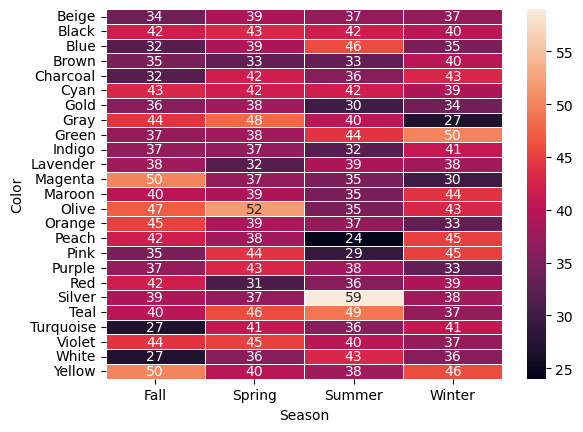

In [983]:
import seaborn as sns

crosstab = pd.crosstab(df['Color'], df['Season'])                             # Для построения heatmap
max_values = crosstab.max().reset_index(name = 'max_value')
maximum = max(max_values['max_value'])
min_values = crosstab.min().reset_index(name = 'min_value')
minimum = min(min_values['min_value'])

sns.heatmap(crosstab, annot=True, vmin=minimum, vmax=maximum, linewidth=.5)



import scipy.stats as stats

statistic, p_value, dof, expected_freq = stats.chi2_contingency(crosstab)     # H_0 : (нулевая гипотеза) Две переменные независимы.
alpha = 0.05                                                                  # H_1 : (альтернативная гипотеза) Две переменные не являются независимыми.
print(f'alpha = {alpha}\np-value = {np.round(p_value, 2)}\n')                 # Видим, что нулевая гипотеза не отвергается

if p_value > alpha:
    print('Цвет не зависит от времени года')
else:
    print('Зависимоть цвета и времени года возможна')

### Подсчет сезонного mau (уникальные пользователей за сезон) и его динамика

,mau
Season,
Fall,975
Spring,999
Summer,955
Winter,971


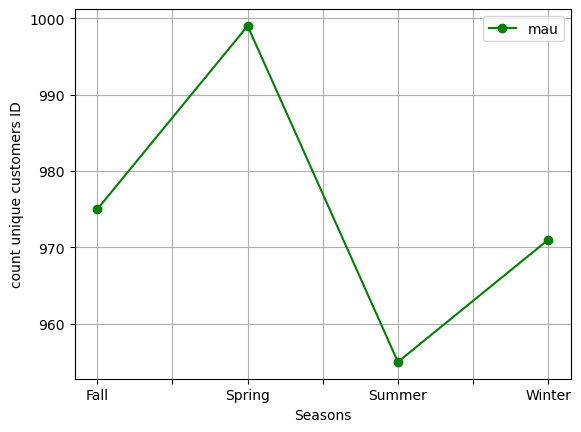

In [984]:
df3 = df.reset_index()[['Customer ID', 'Season']]     # Выделяю таблицу только по id и временам года
df3_group = df3.groupby(['Season'])['Customer ID'].nunique().reset_index(name = 'mau')     # Группирую по временам года с подсчетом уникальных id

# Чуть модернизирую таблицу для нормальных подписей оси икс
df3_group.index = df3_group['Season']
new_df = df3_group.drop('Season', axis = 1)
new_df.plot(xlabel = 'Seasons', ylabel = 'count unique customers ID', grid = True, legend = True, color = 'green', marker='o')

new_df

### Самая популярная буква в названии одежды **! (если выбирать лишь уникальные названия)**

In [985]:
import string

arr_items = np.array(df['Item Purchased'].unique(), dtype = 'U')     # Выбираю уникальные названия элементов одежды
arr_items_lower = np.char.lower(arr_items)     # Перевожу все в нижний регистр

arr_chars = pd.Series(0, index = (i for i in string.ascii_lowercase))     # Создаю словарь всех символов (abcde...)
arr_chars['-'] = 0     # Его тоже надо добавить в словарь
arr_chars_df = pd.DataFrame(arr_chars)     # Формирую DataFrame, чтобы в конце можно было обратиться к символу в ключе
arr_chars_df_rename = arr_chars_df.rename(columns = {0:'count'})     # Для удобства переименовываю столбик

for item in arr_items_lower:     # Теперь пробегаемся по каждому слову и в словах по каждой букве, и добавляем по +1 при встрече конкретной букву в названиях вещей
    for ch in item:
        arr_chars_df_rename.loc[ch][0] += 1
        
result_df = arr_chars_df_rename.reset_index()
max_count_index = result_df['count'].idxmax() 
print(f'Самая популярная буква в названии одежды: {result_df["index"].iloc[max_count_index]}\n')

print(f"Список названий товаров одежды: {df['Item Purchased'].unique()}\n")
print('Таблица с частотой появлений букв: ')
result_df

Самая популярная буква в названии одежды: s

Список названий товаров одежды: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Таблица с частотой появлений букв: 


,index,count
0,a,15
1,b,5
2,c,6
3,d,4
4,e,15
5,f,1
6,g,3
7,h,7
8,i,4
9,j,3


<h1>Задание 3</h1> 

У нас есть данные о потреблении алкоголя о потреблении Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

## **Решение**

In [986]:
url = 'https://raw.githubusercontent.com/PetrashkoLR/Wildberries/main/HW_PYTHON_2/drinks.csv'
df_drinks = pd.read_csv(url, index_col = 0)
df_drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9


In [987]:
max_values_country = pd.DataFrame(df_drinks.idxmax()).rename(columns = {0:'the best country'})

print('Страны, где употребляют наибольший объем конкретного напитка: \n')
max_values_country

Страны, где употребляют наибольший объем конкретного напитка: 



,the best country
beer_servings,Namibia
spirit_servings,Grenada
wine_servings,France
total_litres_of_pure_alcohol,Belarus


<h1>Задание 4</h1> 

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

## **Решение**

In [988]:
url = 'https://raw.githubusercontent.com/PetrashkoLR/Wildberries/main/HW_PYTHON_2/tarantino.csv'
df_tarino = pd.read_csv(url, index_col = 0)
df_tarino.head()

,type,word,minutes_in
movie,,,
Reservoir Dogs,word,dick,0.40
Reservoir Dogs,word,dicks,0.43
Reservoir Dogs,word,fucked,0.55
Reservoir Dogs,word,fucking,0.61
Reservoir Dogs,word,bullshit,0.61


### Число проклятий, летальных исходов и их отношение по фильмам

In [989]:
df_tarino_movies = df_tarino.groupby(['movie', 'type'])['type'].count().reset_index(name = 'count')     # Группирую по фильмам и типу события

df_tarino_pivot_table = df_tarino_movies.pivot_table("count", index="movie", columns="type", margins = True, aggfunc='sum') # Сводная таблица по фильмам
df_tarino_pivot_table = df_tarino_pivot_table.drop('All', axis = 1)                                                         # Удаляю лишний столбик
df_tarino_pivot_table['(word / death)'] = round(df_tarino_pivot_table['word']/df_tarino_pivot_table['death'],2)             # Доп. столбец с отношением величин

print("Таблица с фильмами и кол-вом в каждом из них смертей, проклятий, отношением этих величин, а также данные сразу по всем фильмам:")
df_tarino_pivot_table

Таблица с фильмами и кол-вом в каждом из них смертей, проклятий, отношением этих величин, а также данные сразу по всем фильмам:


type,death,word,(word / death)
movie,,,
Django Unchained,47,262,5.57
Inglorious Basterds,48,58,1.21
Jackie Brown,4,368,92.00
Kill Bill: Vol. 1,63,57,0.90
Kill Bill: Vol. 2,11,69,6.27
Pulp Fiction,7,469,67.00
Reservoir Dogs,10,421,42.10
All,190,1704,8.97


### Частота употребления конкретных прокрятий

In [990]:
df_tarino_curses = df_tarino.groupby(['word'])['word'].count().reset_index(name = 'frequency')     # Группирую по словам - проклятиям
df_tarino_curses = df_tarino_curses.sort_values(['frequency'], ascending = False)                  # Сортировка по убыванию частоты

print("Таблица с проклятиями и частотой их употребления:")
df_tarino_curses

Таблица с проклятиями и частотой их употребления:


,word,frequency
28,fucking,407
49,shit,221
22,fuck,213
46,n-word,179
0,ass,140
31,goddamn,113
43,motherfucker,70
7,bitch,64
35,hell,45
15,damn,37


### Распределение времени между проклятиями

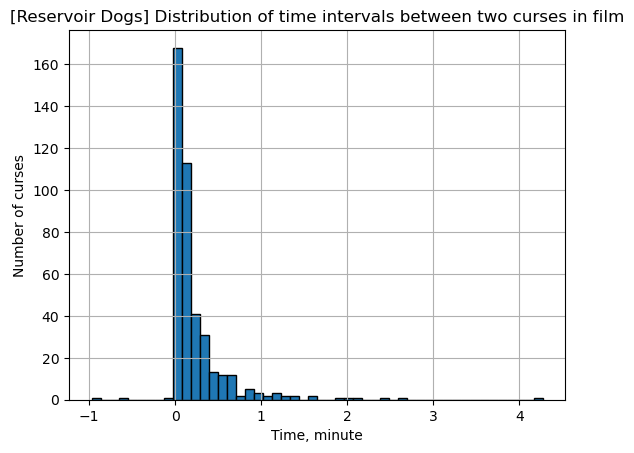

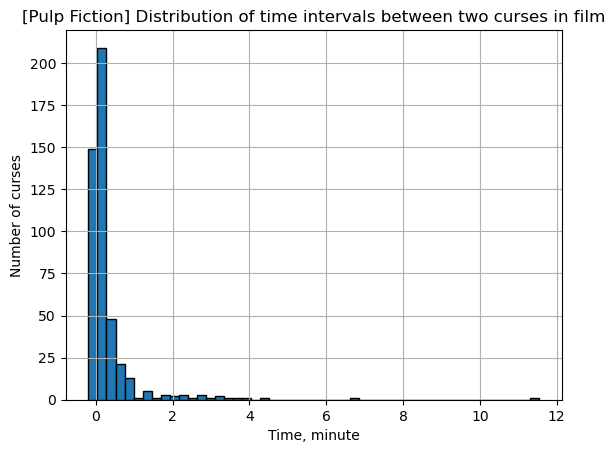

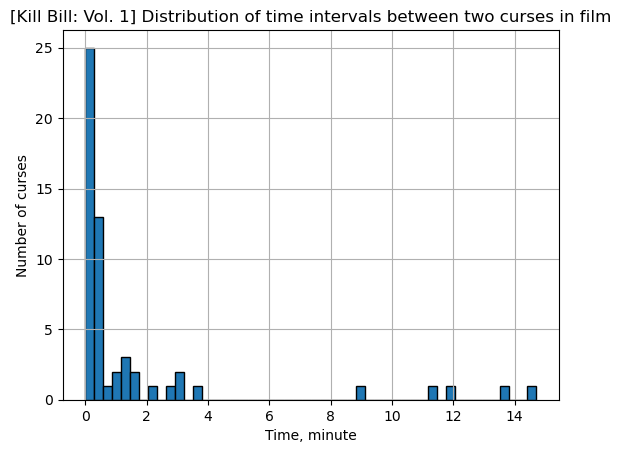

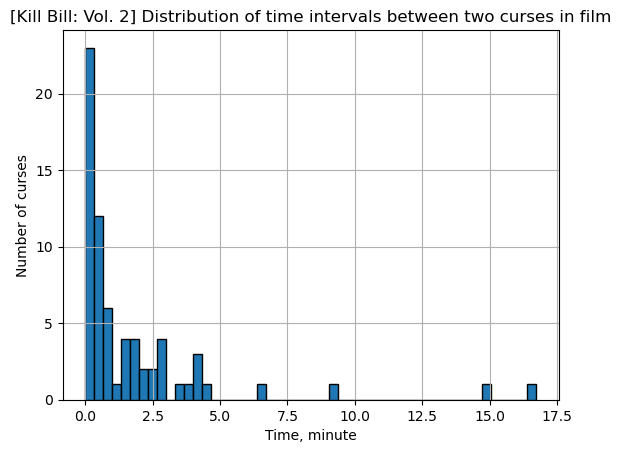

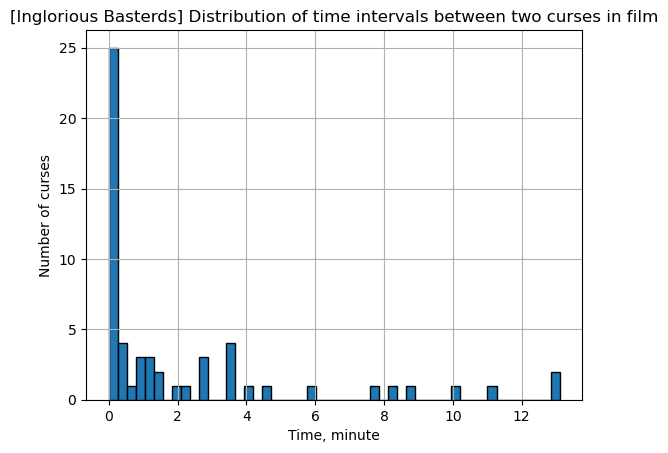

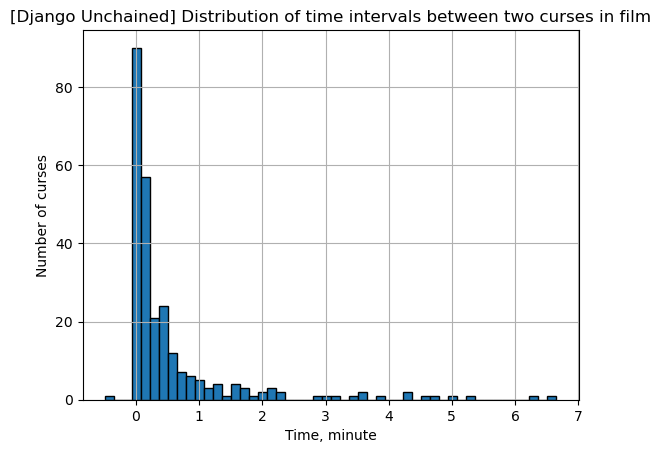

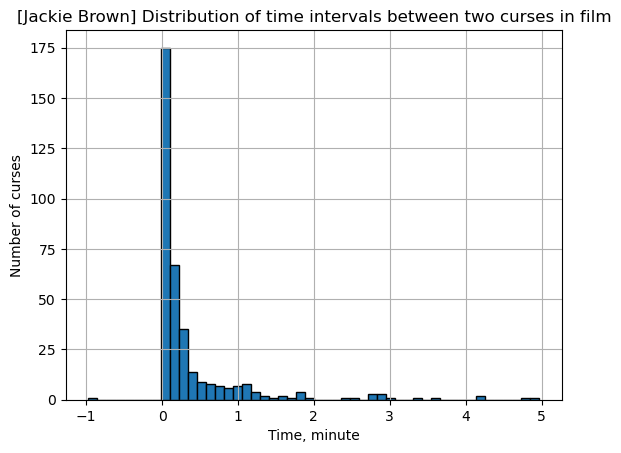

In [991]:
df_tarino_minutes = pd.DataFrame(df_tarino[df_tarino['type'] == 'word']['minutes_in'])     # Отбираю только те времена, которые соответствуют проклятиям
df_tarino_minutes = df_tarino_minutes.reset_index()

movies = df_tarino.reset_index()['movie'].unique()     # Уникальные названия фильмов
for mov in movies:
    # Создаю условно две матрицы с одинаковыми размерами, где в первой матрице (до) отсутствует последняя строка, а во второй - последняя
    # Затем эти таблицы вычитаются и получается таблица (для конкретного фильма) с разницами времен
    minutes_do = df_tarino_minutes[df_tarino_minutes['movie'] == mov].iloc[:-1,:].reset_index().drop('index', axis = 1)
    minutes_posle = df_tarino_minutes[df_tarino_minutes['movie'] == mov].iloc[1:,:].reset_index().drop('index', axis = 1)
    
    result = pd.DataFrame(minutes_posle['minutes_in'].subtract(minutes_do['minutes_in']))
    result.plot.hist(bins = 50, grid = True, legend = False, xlabel = "Time, minute", ylabel = "Number of curses", title = f"[{mov}] Distribution of time intervals between two curses in film", alpha=1, edgecolor='black')
